In [8]:
#impoeting all necessary lobraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Importing libraries to create Decision Tree Classifier and visualizing the Tree structure
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import graphviz
        

In [3]:
data = pd.read_csv("/content/Iris.csv")
data
     

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.drop('Id',axis=1,inplace=True)

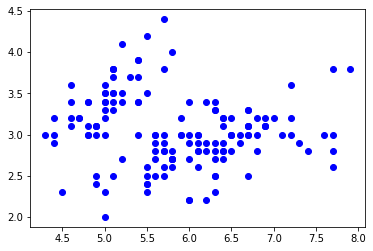

In [6]:
#visualizing the dataset
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'],color='b')
plt.show()

In [9]:
# Seperating independent and target variable
x = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y= data[['Species']]

In [10]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [12]:
#Splitting data into train adn test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
     

In [13]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [14]:
x_train.shape

(105, 4)

In [15]:
#Building Decision Tree
clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2,random_state=0)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)


[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),


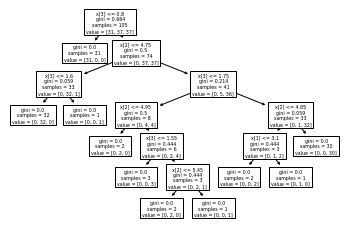

In [16]:
tree.plot_tree(clf)

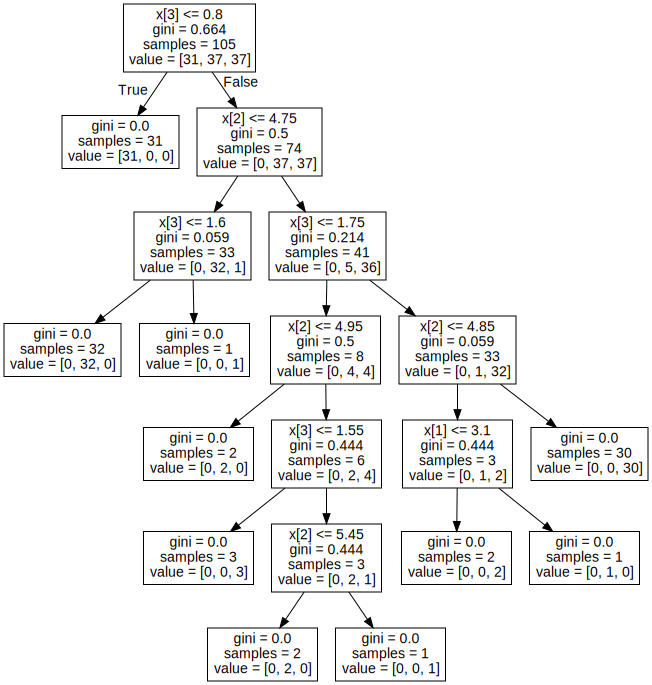

In [17]:
# Visualizing using graphviz 
dot_data = tree.export_graphviz(clf,out_file=None)
graph = graphviz.Source(dot_data)
graph

In [18]:
#Checking Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy Score:',accuracy_score(y_test,y_test_pred)*100,'%')
print('Confusion matrix:\n',confusion_matrix(y_test,y_test_pred))

Accuracy Score: 100.0 %
Confusion matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [19]:
# Predicting with our own data
my_data = [[5.3,3.2,4.7,1.3],[7.2,3.5,1.6,2.5]]
print(clf.predict(my_data))


['Iris-versicolor' 'Iris-virginica']


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
